<a href="https://colab.research.google.com/github/ruforavishnu/Project_Machine_Learning/blob/master/Project_11_Unsupervised_Learning_K_means_clustering_Customer_segmentation_using_K_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install numpy pandas matplotlib seaborn scikit-learn

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("abdallahwagih/mall-customers-segmentation")

print("Path to dataset files:", path)

100%|██████████| 1.56k/1.56k [00:00<00:00, 1.43MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/abdallahwagih/mall-customers-segmentation/versions/1


In [3]:
import os

files = os.listdir(path)

for file in files:
  print(file)

Mall_Customers.csv


In [5]:
import pandas as pd

csv_file = os.path.join(path, 'Mall_Customers.csv')

df = pd.read_csv(csv_file)

print(df.head())

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
df = df.rename(columns={'Genre': 'Gender'})
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [10]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Data Preprocessing

In [11]:
print(df.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


Lets drop columns which are not useful for clustering

In [12]:
df = df.drop(columns={'CustomerID','Gender'})

df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     200 non-null    int64
 1   Annual Income (k$)      200 non-null    int64
 2   Spending Score (1-100)  200 non-null    int64
dtypes: int64(3)
memory usage: 4.8 KB


Standardize the data

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['Age','Annual Income (k$)','Spending Score (1-100)']])


In [16]:
print(df_scaled)

[[-1.42456879 -1.73899919 -0.43480148]
 [-1.28103541 -1.73899919  1.19570407]
 [-1.3528021  -1.70082976 -1.71591298]
 [-1.13750203 -1.70082976  1.04041783]
 [-0.56336851 -1.66266033 -0.39597992]
 [-1.20926872 -1.66266033  1.00159627]
 [-0.27630176 -1.62449091 -1.71591298]
 [-1.13750203 -1.62449091  1.70038436]
 [ 1.80493225 -1.58632148 -1.83237767]
 [-0.6351352  -1.58632148  0.84631002]
 [ 2.02023231 -1.58632148 -1.4053405 ]
 [-0.27630176 -1.58632148  1.89449216]
 [ 1.37433211 -1.54815205 -1.36651894]
 [-1.06573534 -1.54815205  1.04041783]
 [-0.13276838 -1.54815205 -1.44416206]
 [-1.20926872 -1.54815205  1.11806095]
 [-0.27630176 -1.50998262 -0.59008772]
 [-1.3528021  -1.50998262  0.61338066]
 [ 0.94373197 -1.43364376 -0.82301709]
 [-0.27630176 -1.43364376  1.8556706 ]
 [-0.27630176 -1.39547433 -0.59008772]
 [-0.99396865 -1.39547433  0.88513158]
 [ 0.51313183 -1.3573049  -1.75473454]
 [-0.56336851 -1.3573049   0.88513158]
 [ 1.08726535 -1.24279661 -1.4053405 ]
 [-0.70690189 -1.24279661

Applying K-Means Clustering

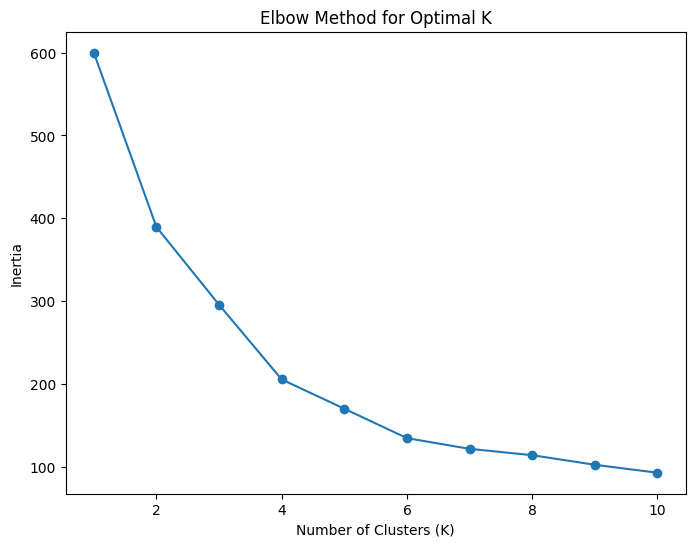

In [19]:
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt

# range of cluster numbers to try
k_range = range(1,11)

inertia_values = []


for k in k_range:
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(df_scaled)
  inertia_values.append(kmeans.inertia_)


#Plot inertia vs K
plt.figure(figsize=(8,6))
plt.plot(k_range, inertia_values, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()





From the above plot diagram - 5 looks like where the inertia starts decreasing

In [20]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(df_scaled)

df['Cluster'] = kmeans.labels_


In [30]:
df

,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,19,15,39,2
1,21,15,81,2
2,20,16,6,3
3,23,16,77,2
4,31,17,40,2
...,...,...,...,...
195,35,120,79,1
196,45,126,28,4
197,32,126,74,1
198,32,137,18,4


Visualizing the Clusters

         PCA1      PCA2  Cluster
0   -0.615720 -1.763481        2
1   -1.665793 -1.820747        2
2    0.337862 -1.674799        3
3   -1.456573 -1.772430        2
4   -0.038465 -1.662740        2
..        ...       ...      ...
195 -1.093705  2.215577        1
196  0.800448  2.540748        4
197 -1.119709  2.445169        1
198  0.395411  2.946665        4
199 -1.488004  2.847018        1

[200 rows x 3 columns]


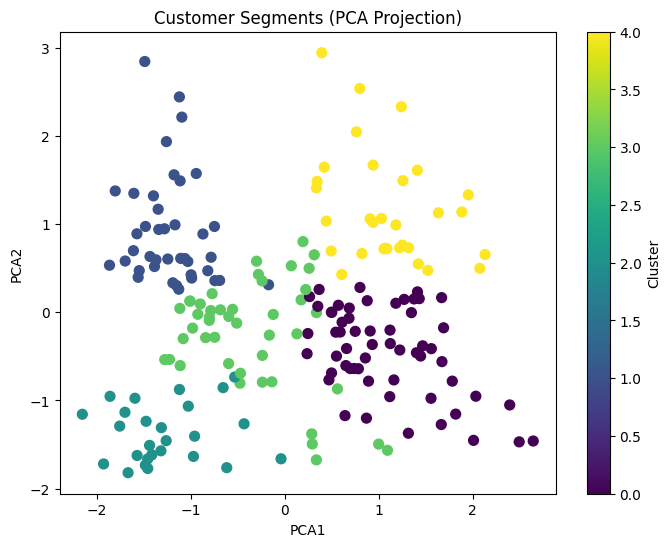

In [31]:
from sklearn.decomposition import PCA

# apply PCA to reduce data to 2D
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

df_pca_df = pd.DataFrame(df_pca, columns=['PCA1', 'PCA2'])

df_pca_df['Cluster'] = df['Cluster']

print(df_pca_df)

# Plot the clusters
plt.figure(figsize=(8,6))
plt.scatter(df_pca_df['PCA1'], df_pca_df['PCA2'], c=df_pca_df['Cluster'], cmap='viridis', s=50)

plt.title('Customer Segments (PCA Projection)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.colorbar(label='Cluster')
plt.show()

Interpret the Results

In [23]:
print('Cluster Centroids')
print(kmeans.cluster_centers_)


Cluster Centroids
[[ 1.17882975 -0.49388609 -0.32971553]
 [-0.42880597  0.97484722  1.21608539]
 [-0.93876351 -1.31473131  0.95680216]
 [-0.86957306 -0.23851652 -0.36060916]
 [ 0.39737911  1.11508909 -1.23126963]]


In [24]:
print(df.groupby('Cluster').mean())

               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        55.275862           47.620690               41.706897
1        32.875000           86.100000               81.525000
2        25.769231           26.115385               74.846154
3        26.733333           54.311111               40.911111
4        44.387097           89.774194               18.483871


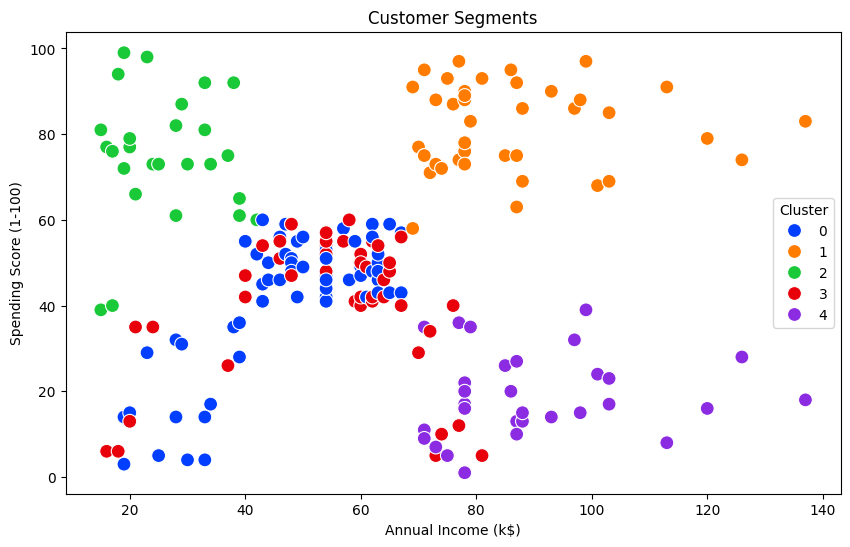

In [25]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='bright', s=100)
plt.title('Customer Segments')
plt.show()

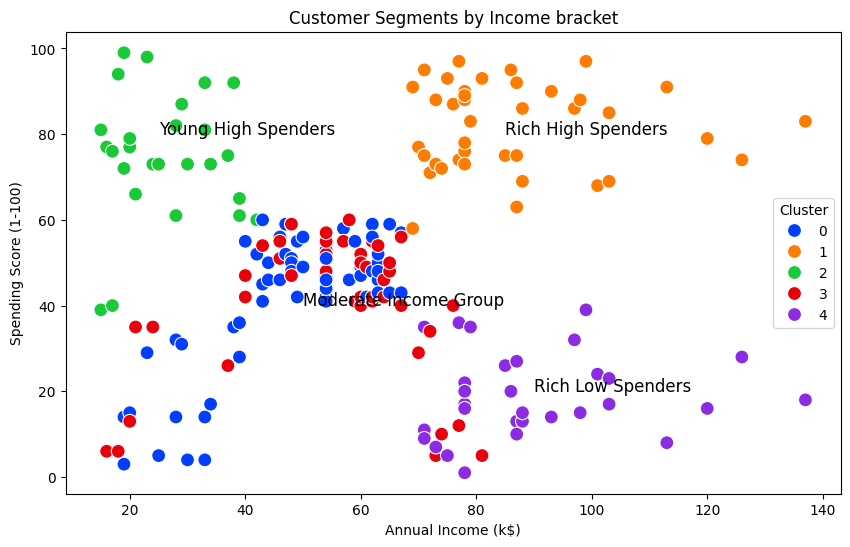

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='bright', s=100)

# Title and axis labels
plt.title('Customer Segments by Income bracket')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

# Now add custom text at certain positions
plt.text(25, 80, 'Young High Spenders', fontsize=12, color='black')
plt.text(85, 80, 'Rich High Spenders', fontsize=12, color='black')
plt.text(90, 20, 'Rich Low Spenders', fontsize=12, color='black')
plt.text(50, 40, 'Moderate Income Group', fontsize=12, color='black')

plt.legend(title='Cluster')
plt.show()


Successful. We have successfully figured out a pattern from a dataset that had no labels. This is the power of unsupervised learning .


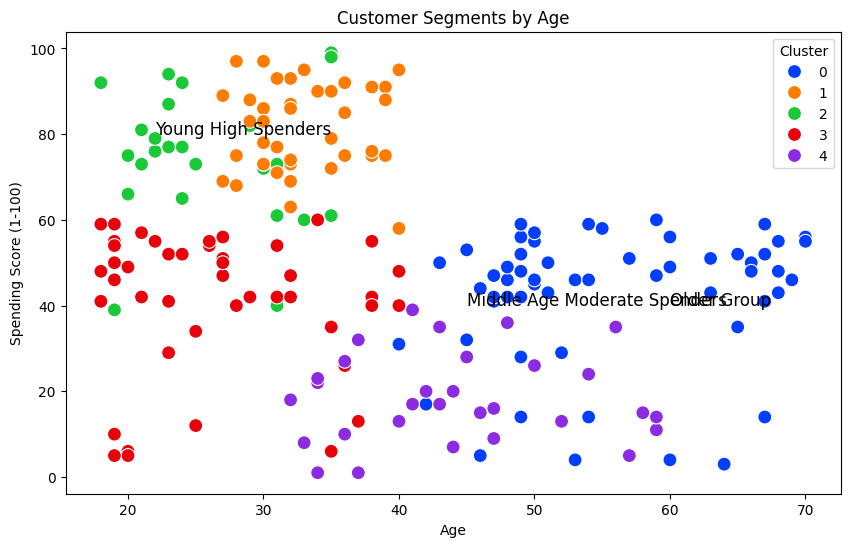

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot based on Age and Spending Score
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Age', y='Spending Score (1-100)', hue='Cluster', palette='bright', s=100)

# Add title and axis labels
plt.title('Customer Segments by Age')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')

# Now add custom text annotations
plt.text(22, 80, 'Young High Spenders', fontsize=12, color='black')
plt.text(45, 40, 'Middle Age Moderate Spenders', fontsize=12, color='black')
plt.text(60, 40, 'Older Group', fontsize=12, color='black')

# Legend
plt.legend(title='Cluster')
plt.show()


From a dataset that had no labels we have successfully found out hidden clusters in it.